In [1]:
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [28]:
# Read CSV
Fire = pd.read_csv("Resources/fire_archive_M-C61_423958.csv")
Fire.head(5)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   19.4050  -155.2786       362.3   1.7    1.3  2014-01-01      1147   
1   19.4384  -155.0778       352.9   1.7    1.3  2014-01-01      1147   
2   19.4366  -155.0624       340.5   1.7    1.3  2014-01-01      1147   
3   19.4030  -155.2622       314.0   1.7    1.3  2014-01-01      1147   
4   19.4270  -155.0791       314.7   1.7    1.3  2014-01-01      1147   

  satellite instrument  confidence  version  bright_t31    frp daynight  type  
0      Aqua      MODIS         100     6.03       287.3  210.6        N     1  
1      Aqua      MODIS         100     6.03       294.7  147.6        N     1  
2      Aqua      MODIS         100     6.03       294.3   95.5        N     1  
3      Aqua      MODIS          84     6.03       285.3   32.4        N     1  
4      Aqua      MODIS          86     6.03       288.3   30.0        N     1

In [18]:
unique_counts = Fire["acq_date"].value_counts()
unique_counts.count()

3318

In [17]:
unique=Fire["acq_date"].count()
unique

1201829

In [59]:
sort_by_date= Fire.groupby(["acq_date"])[["confidence","frp", "latitude", "longitude"]].mean()
sort_by_date.head(5)

confidence        frp   latitude   longitude
acq_date                                                
2014-01-01   63.878788  27.193939  31.183809 -111.717812
2014-01-02   66.205882  44.017647  28.814403 -117.617094
2014-01-03   66.482456  34.950000  33.276468 -109.831242
2014-01-04   60.075472  37.386792  33.212540 -100.908079
2014-01-05   75.821918  62.758904  35.599826 -122.203895

In [44]:
sort_by_date.count()

confidence    3318
frp           3318
latitude      3318
longitude     3318
dtype: int64

In [58]:
sort_by_date.loc[sort_by_date["frp"]> 50].count()

confidence    1272
frp           1272
latitude      1272
longitude     1272
dtype: int64

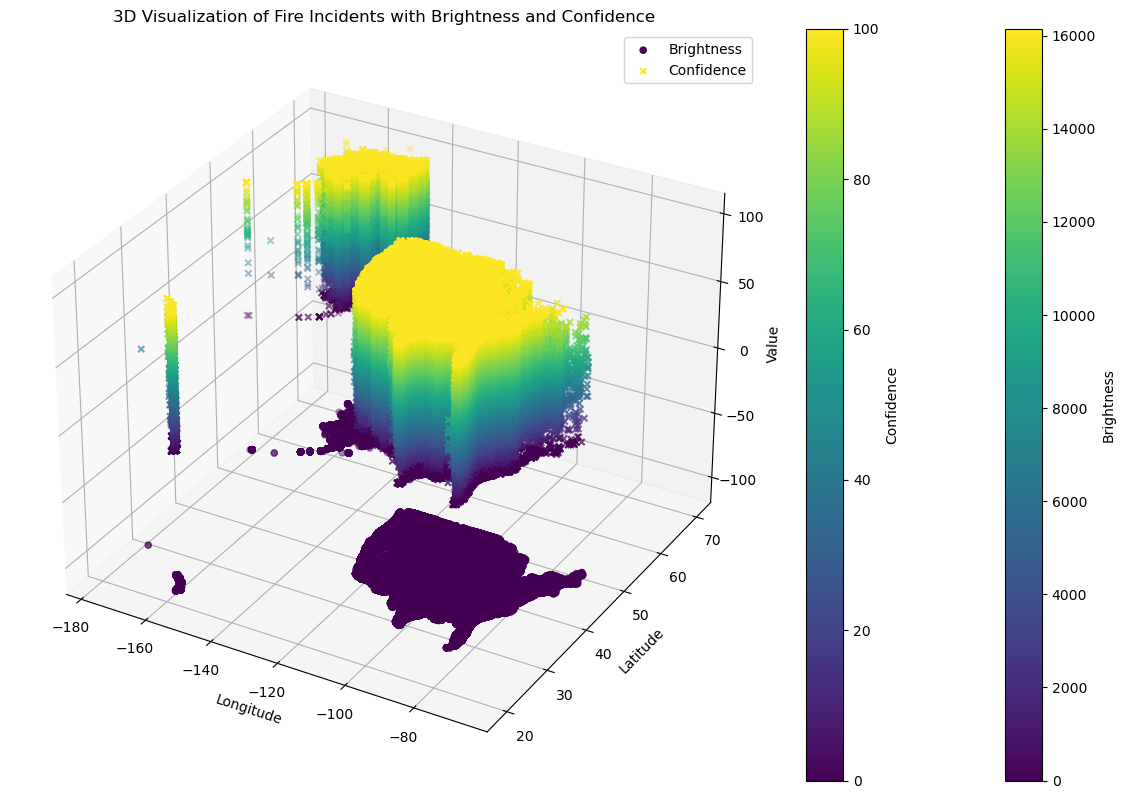

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have access to the Fire data frame with columns latitude, longitude, brightness, and confidence
latitudes_unique = Fire["latitude"]
longitudes_unique = Fire["longitude"]
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
brightness = Fire["frp"]
confidence = Fire["confidence"]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
z1= -105
# Plot points representing brightness
ax.scatter(longitudes_unique, latitudes_unique, z1, c=brightness, cmap='viridis', label='Brightness')


# Plot points representing confidence using different marker
ax.scatter(longitudes, latitudes, confidence, c=confidence, cmap='viridis', marker='x', label='Confidence')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Value')
ax.set_title('3D Visualization of Fire Incidents with Brightness and Confidence')

# Add colorbars
cbar1 = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Brightness')
cbar2 = fig.colorbar(ax.collections[1], ax=ax, orientation='vertical', label='Confidence')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

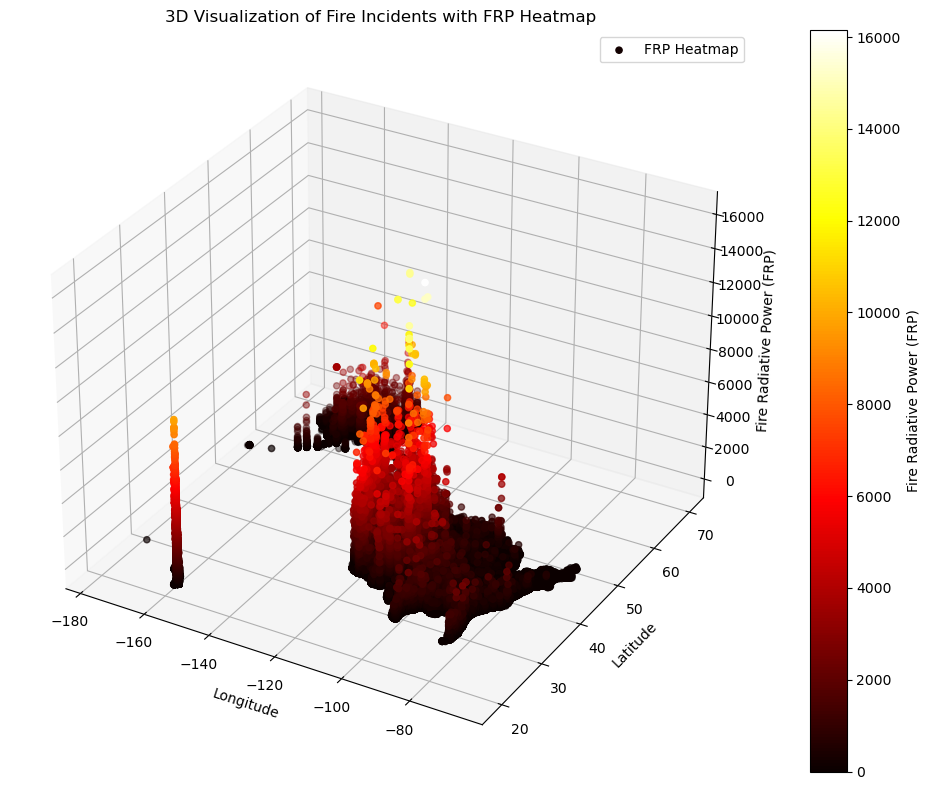

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have access to the Fire data frame with columns latitude, longitude, brightness, and confidence
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
frp = Fire["frp"]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points representing fire radiative power (frp) as a heatmap
ax.scatter(longitudes, latitudes, frp, c=frp, cmap='hot', label='FRP Heatmap')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Fire Radiative Power (FRP)')
ax.set_title('3D Visualization of Fire Incidents with FRP Heatmap')

# Add colorbar
cbar = fig.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Fire Radiative Power (FRP)')

# Add legend
ax.legend()
plt.savefig('fire_incidents_3d_heatmap.png', dpi=600)
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1201829,) and arg 2 with shape (3318,).

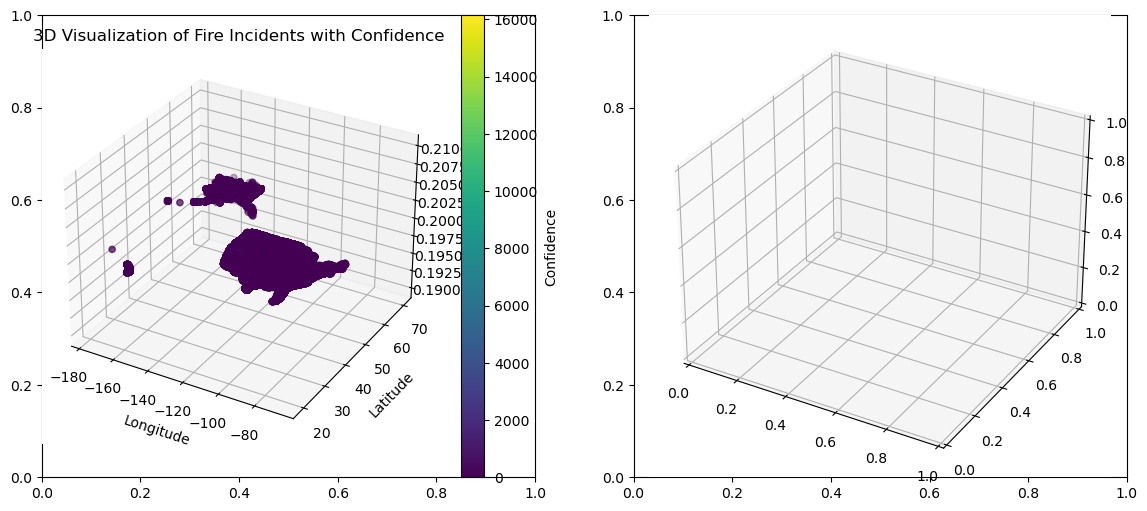

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have access to the Fire data frame with columns latitude, longitude, brightness, and confidence
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
brightness = Fire["frp"]
confidence = sort_by_date["confidence"]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 2D Map (latitude, longitude, brightness)
#ax1.scatter(longitudes, latitudes, c=brightness, cmap='hot', alpha=0.7)
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('Latitude')
#ax1.set_title('2D Visualization of Fire Incidents with Brightness')
#cbar1 = fig.colorbar(ax1.scatter([], [], c=[], cmap='hot'), ax=ax1, orientation='vertical', label='Brightness')
z= 0.2

# 3D Map (latitude, longitude, confidence)
ax2 = fig.add_subplot(121, projection='3d')
sc = ax2.scatter(longitudes, latitudes, z, c=brightness, cmap='viridis')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Confidence')
ax2.set_title('3D Visualization of Fire Incidents with Confidence')
cbar2 = fig.colorbar(sc, ax=ax2, orientation='vertical', label='Confidence')


# 3D Map (latitude, longitude, confidence)
ax2 = fig.add_subplot(122, projection='3d')
sc = ax2.scatter(longitudes, latitudes, confidence, c=confidence, cmap='viridis')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Confidence')
ax2.set_title('3D Visualization of Fire Incidents with Confidence')
cbar2 = fig.colorbar(sc, ax=ax2, orientation='vertical', label='Confidence')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def create_example_file(filename: str) -> None:
    """Create an example image"""
    X = np.arange(-2.5 * np.pi, 3.5 * np.pi, 0.25)
    Y = np.arange(-2.5 * np.pi, 3.5 * np.pi, 0.25)
    
    xx, yy = np.meshgrid(X, Y)
    zz = ((np.sin(xx) + np.sin(yy)) + 2) * (255 / 4)
    Image.fromarray(zz.astype(np.uint8)).save(filename)


filename = 'image.tiff'
create_example_file(filename)

img = Image.open(filename)
X = np.arange(img.size[0])
Y = np.arange(img.size[1])

xx, yy = np.meshgrid(X, Y)
zz = np.array(img)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis')
C = ax.contourf(xx, yy, zz, z_dir='z', offset=-300, cmap='viridis')
ax.set_zlim(-300, 255)
ax.set_xlabel('x-Axis')
ax.set_ylabel('y-Axis')
ax.set_zlabel('z-Axis')

fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1)
fig.tight_layout()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import pandas as pd

def near(p, pntList, d0):
    cnt = 0
    for pj in pntList:
        dist = np.linalg.norm(p - pj)
        if dist < d0:
            cnt += 1 - dist / d0
    return cnt



# Extract latitude, longitude, and brightness columns
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
brightness = Fire["bright_t31"]
confidence = Fire["confidence"]


# Define function to generate random points on a sphere
def random_point(r=1):
    ct = 2 * np.random.rand() - 1
    st = np.sqrt(1 - ct ** 2)
    phi = 2 * np.pi * np.random.rand()
    x = r * st * np.cos(phi)
    y = r * st * np.sin(phi)
    z = r * ct
    return np.array([x, y, z])

# Generate random points
pointList = np.array([random_point(10.05) for i in range(len(Fire))])

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Create the sphere surface
u = np.linspace(0, 2 * np.pi, 120)
v = np.linspace(0, np.pi, 60)
XX = 10 * np.outer(np.cos(u), np.sin(v))
YY = 10 * np.outer(np.sin(u), np.sin(v))
ZZ = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Compute nearness to each point on the sphere
WW = XX.copy()
for i in range(len(XX)):
    for j in range(len(XX[0])):
        x = XX[i, j]
        y = YY[i, j]
        z = ZZ[i, j]
        WW[i, j] = near(np.array([x, y, z]), pointList, 3)

# Normalize and apply colormap
WW = WW / np.amax(WW)
myheatmap = WW

# Plot the sphere surface
ax.plot_surface(XX, YY, ZZ, cstride=1, rstride=1, facecolors=cm.jet(myheatmap))
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


def random_point( r=1 ):
    ct = 2*np.random.rand() - 1
    st = np.sqrt( 1 - ct**2 )
    phi = 2* np.pi *  np.random.rand()
    x = r * st * np.cos( phi)
    y = r * st * np.sin( phi)
    z = r * ct
    return np.array( [x, y, z ] )

def near( p, pntList, d0 ):
    cnt=0
    for pj in pntList:
        dist=np.linalg.norm( p - pj )
        if dist < d0:
            cnt += 1 - dist/d0
    return cnt


"""
https://stackoverflow.com/questions/22128909/plotting-the-temperature-distribution-on-a-sphere-with-python
"""

pointList = np.array([ random_point( 10.05 ) for i in range( 65 ) ] )

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1, projection='3d')

u = np.linspace( 0, 2 * np.pi, 120)
v = np.linspace( 0, np.pi, 60 )

# create the sphere surface
XX = 10 * np.outer( np.cos( u ), np.sin( v ) )
YY = 10 * np.outer( np.sin( u ), np.sin( v ) )
ZZ = 10 * np.outer( np.ones( np.size( u ) ), np.cos( v ) )

WW = XX.copy()
for i in range( len( XX ) ):
    for j in range( len( XX[0] ) ):
        x = XX[ i, j ]
        y = YY[ i, j ]
        z = ZZ[ i, j ]
        WW[ i, j ] = near(n p.array( [x, y, z ] ), pointList, 3)
WW = WW / np.amax( WW )
myheatmap = WW

# ~ ax.scatter( *zip( *pointList ), color='#dd00dd' )
ax.plot_surface( XX, YY,  ZZ, cstride=1, rstride=1, facecolors=cm.jet( myheatmap ) )
plt.show() 

C:\Users\tina\AppData\Local\Temp\ipykernel_7500\1121678983.py:29: UserWarning: The following kwargs were not used by contour: 'z_dir'
  C = ax.contourf(xx, yy, zz, z_dir='z', offset=-300, cmap='viridis')


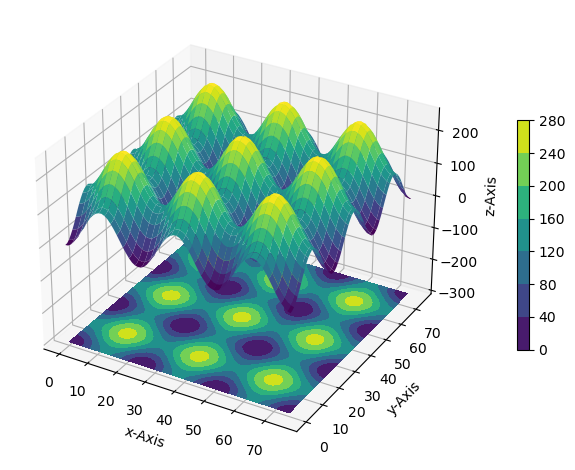

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def create_example_file(filename: str) -> None:
    """Create an example image"""
    X = np.arange(-2.5 * np.pi, 3.5 * np.pi, 0.25)
    Y = np.arange(-2.5 * np.pi, 3.5 * np.pi, 0.25)
    
    xx, yy = np.meshgrid(X, Y)
    zz = ((np.sin(xx) + np.sin(yy)) + 2) * (255 / 4)
    Image.fromarray(zz.astype(np.uint8)).save(filename)


filename = 'image.tiff'
create_example_file(filename)

img = Image.open(filename)
X = np.arange(img.size[0])
Y = np.arange(img.size[1])

xx, yy = np.meshgrid(X, Y)
zz = np.array(img)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis')
C = ax.contourf(xx, yy, zz, z_dir='z', offset=-300, cmap='viridis')
ax.set_zlim(-300, 255)
ax.set_xlabel('x-Axis')
ax.set_ylabel('y-Axis')
ax.set_zlabel('z-Axis')

fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1)
fig.tight_layout()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate latitude and longitude data
# For example, let's create a grid of latitudes from -90 to 90 and longitudes from -180 to 180
lats = np.linspace(-90, 90, 100)
lngs = np.linspace(-180, 180, 100)


LAT= Fire["longitude"]
LNG= Fire["latitude"]

# Create grid
#LNG, LAT = np.meshgrid(lngs, lats)

# Define function based on latitudes and longitudes
#Z = np.sin(np.radians(LAT)) + np.cos(np.radians(LNG))
Z= Fire["brightness"]

# Create figure container
fig = plt.figure(figsize=(100, 50))
ax = plt.axes(projection='3d')

# 3d contour plot
ax.contour3D(LNG, LAT, Z, 100, cmap='viridis')

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Function Value')

# Show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

latitudes= Fire["longitude"]
longitudes= Fire["latitude"]

#z=  Fire["brightness"]
# Function to simulate fire spread based on latitude and longitude
def spread_fire(latitudes, longitudes, fire_intensity):
    # Calculate some fake fire spread based on latitude and longitude
    fire_spread = fire_intensity * np.random.rand(len(latitudes))
    return fire_spread

# Sample latitude and longitude data (replace with your actual data)
latitudes = np.random.uniform(low=-90, high=90, size=1000)
longitudes = np.random.uniform(low=-180, high=180, size=1000)

# Sample fire intensity (replace with your actual fire intensity data)
fire_intensity = longitudes= Fire["frp"]


# Spread fire
fire_spread = spread_fire(latitudes, longitudes, fire_intensity)

# Create a map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

# Plot fire spread
ax.scatter(longitudes, latitudes, c=fire_spread, cmap='hot', transform=ccrs.PlateCarree(), s=10)

# Add colorbar
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Fire Intensity')

# Show plot
plt.title('Fire Spread Visualization')
plt.show()

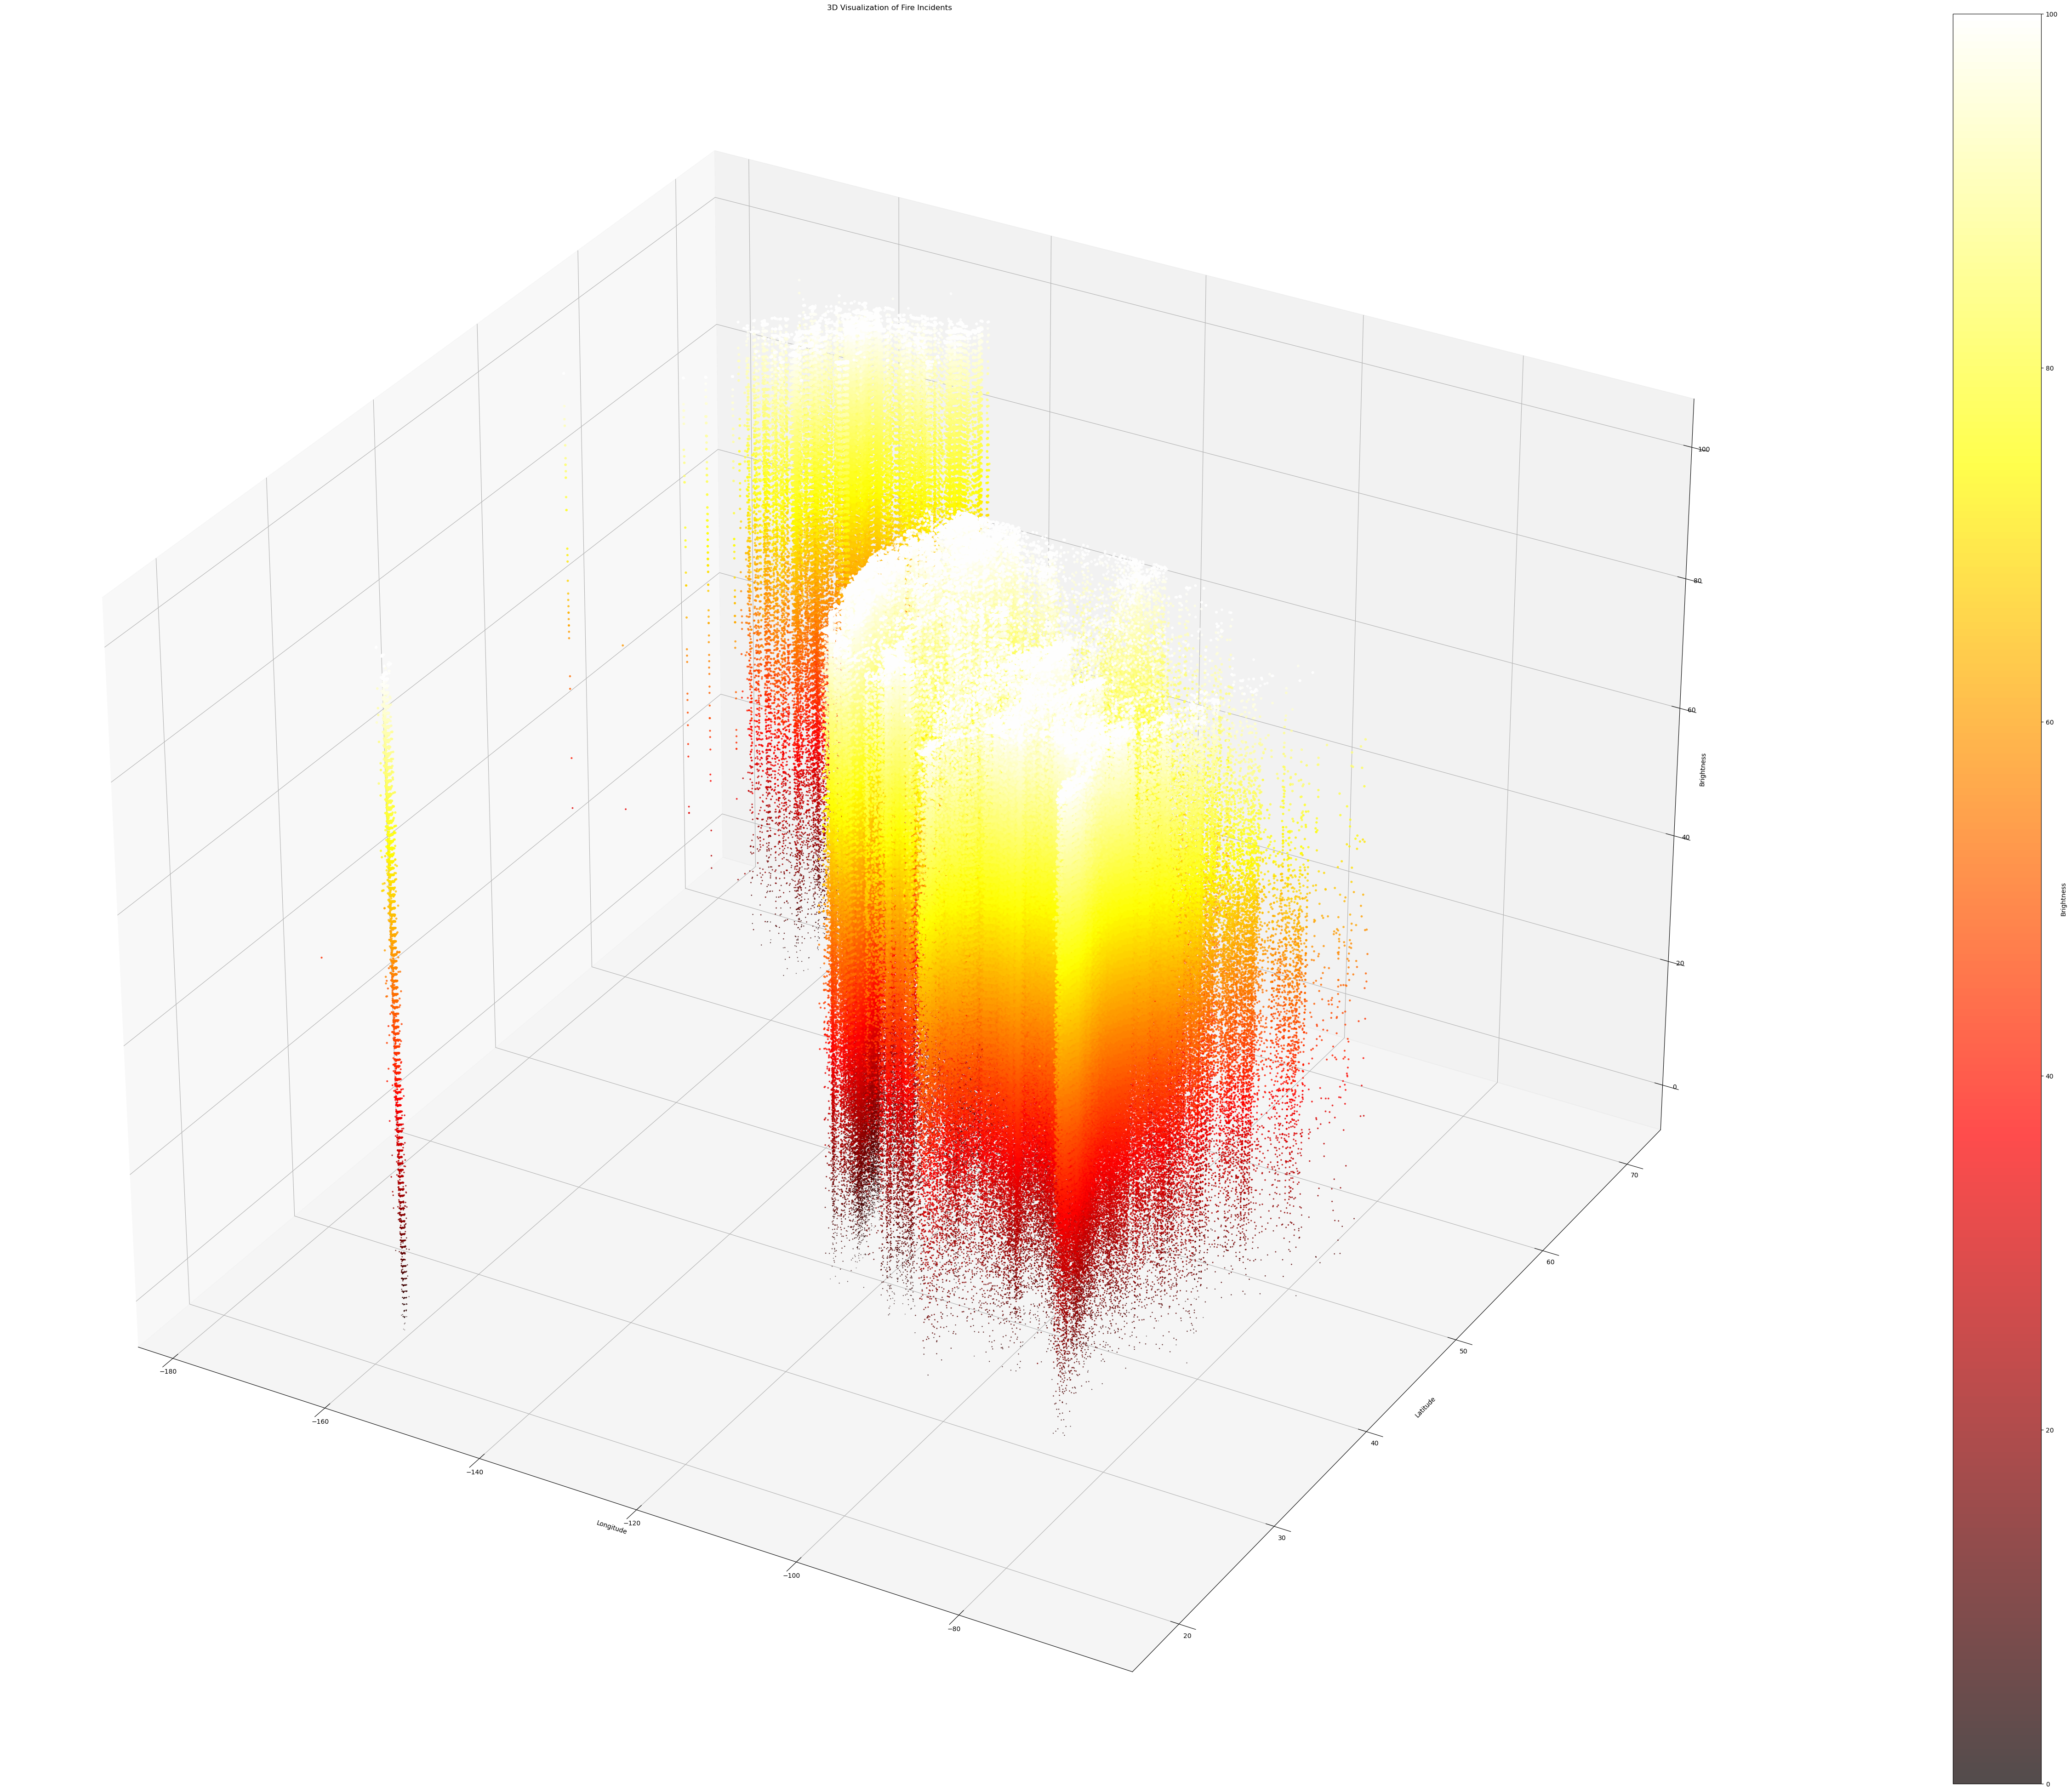

<Figure size 640x480 with 0 Axes>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

lat = np.linspace(-400, 400, 10)
lngs = np.linspace(-500, 500, 10)


# Sample data (replace with your actual data)
latitudes = Fire["latitude"]
longitudes = Fire["longitude"]
brightness = Fire["confidence"]

# Create a 3D scatter plot
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(111, projection='3d')

# Plot fire incidents with size and color representing brightness
sc = ax.scatter(longitudes, latitudes, brightness, c=brightness, cmap='hot', s=brightness/10, alpha=0.7)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Brightness')
plt.title('3D Visualization of Fire Incidents')

# Add colorbar
cbar = plt.colorbar(sc, orientation='vertical')
cbar.set_label('Brightness')

plt.show()
plt.savefig('3d_contour.png', dpi = 600)